In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

params = np.load('sample_params.npy')

print(params.shape)

(7, 525)


In [2]:
a_i = params[0]; e_i = params[1]; i_i = params[2];
p_i = params[3]; l_i = params[4]; 
x_i = params[5]; y_i = params[6]

def cart_to_pol(x,y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y,x)
    return r, phi

def tisserand(a,e,i):
    return 5.2/a + 2*np.cos(i*np.pi/180) * np.sqrt(a*(1-e**2)/5.2)

r_i, phi = cart_to_pol(x_i,y_i)
tpi = tisserand(a_i,e_i,i_i)

/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1923076923076923 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


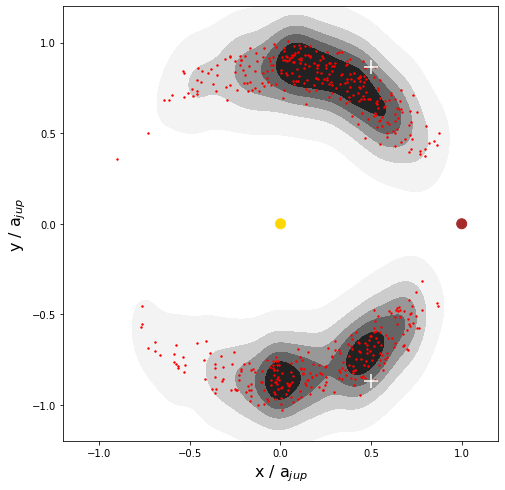

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(x_i/5.2, y_i/5.2,bw=1/5.2,shade=True,shade_lowest=False,levels=6,cmap='Greys',ax=ax)
ax.scatter(x_i/5.2,y_i/5.2,s=2,c='r')
ax.scatter([0,1],[0,0],c=['gold','brown'],s=100)
ax.scatter([0.5,0.5],[np.sqrt(3)/2,-np.sqrt(3)/2],marker='+',c='white',s=200,zorder=10)
ax.set_ylim(-1.2,1.2)
ax.set_xlim(-1.2,1.2)
ax.set_ylabel(r'y / a$_{jup}$',fontsize=16)
ax.set_xlabel(r'x / a$_{jup}$',fontsize=16)
ax.set_aspect('equal')
fig.savefig('initial_xy.png',dpi=300)
fig.show()

/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


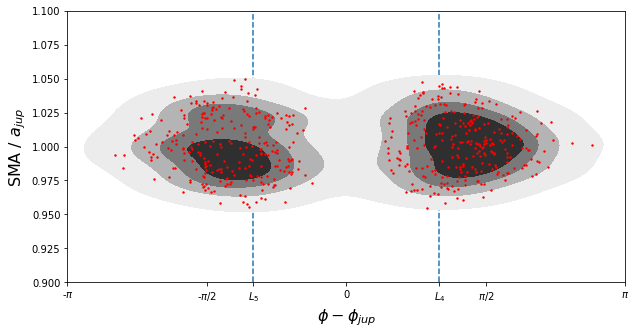

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(phi,a_i/5.2,shade=True,shade_lowest=False,levels=5,cmap='Greys',ax=ax)
ax.scatter(phi,a_i/5.2,s=2,c='r')
ax.set_xlabel(r"$\phi - \phi_{jup}$",fontsize=16)
ax.set_ylabel(r"SMA / $a_{jup}$",fontsize=16)
ax.vlines([-np.pi/3,np.pi/3],0.9,1.1,ls='--',zorder=0)
ax.set_xticks([-np.pi,-np.pi/2,-np.pi/3,0,np.pi/3,np.pi/2,np.pi])
ax.set_xticklabels([r"-$\pi$",r"-$\pi$/2",r"$L_5$",'0',r"$L_4$",r"$\pi$/2",r"$\pi$"])
ax.set_ylim(0.9,1.1)
ax.set_xlim(-np.pi,np.pi)
fig.show()

/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using [0.2, 2] for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/mdodici/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


ValueError: `bw_method` should be 'scott', 'silverman', a scalar or a callable.

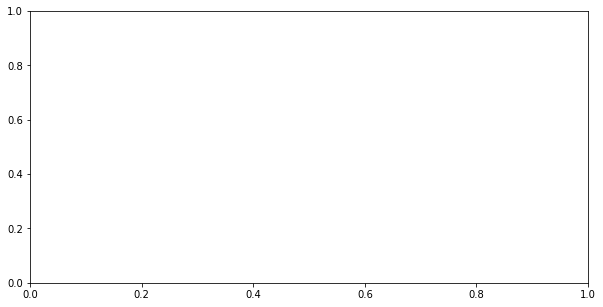

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(phi,i_i,bw=[.2,2],shade=True,shade_lowest=False,cmap='Greys',ax=ax)
#ax.hist2d(phi,i_i,bins=(18,9),range=[[-np.pi,np.pi],[0,30]],cmap='Greys')
ax.scatter(phi,i_i,s=2,c='r')
ax.vlines([-np.pi/3,np.pi/3],0.9,1.1,ls='--')
ax.set_xticks([-np.pi,-np.pi/2,-np.pi/3,0,np.pi/3,np.pi/2,np.pi])
ax.set_xticklabels([r"-$\pi$",r"-$\pi$/2",r"$L_5$",'0',r"$L_4$",r"$\pi$/2",r"$\pi$"])
ax.set_xlabel(r"$\phi - \phi_{jup}$",fontsize=16)
ax.set_ylabel('Inclination',fontsize=16)
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim(0,30)
fig.show()